<a href="https://colab.research.google.com/github/konapalask/Supervised_learning/blob/main/heart_disease_prediction_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_csv('/content/heart.csv')  # Ensure this CSV matches column order from [file:1]

In [5]:
print(df.isnull().sum())
# Optionally: fill missing values if any
df = df.fillna(df.median())

# Encode categorical features (cp, slope, thal)
categorical_cols = ['cp', 'slope', 'thal']
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

X = df.drop('target', axis=1)
y = df['target']

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


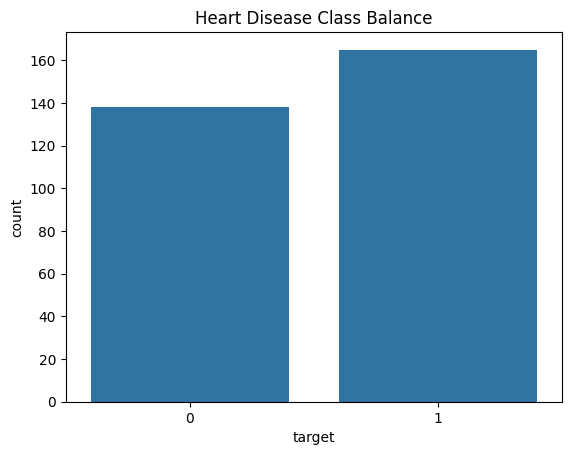

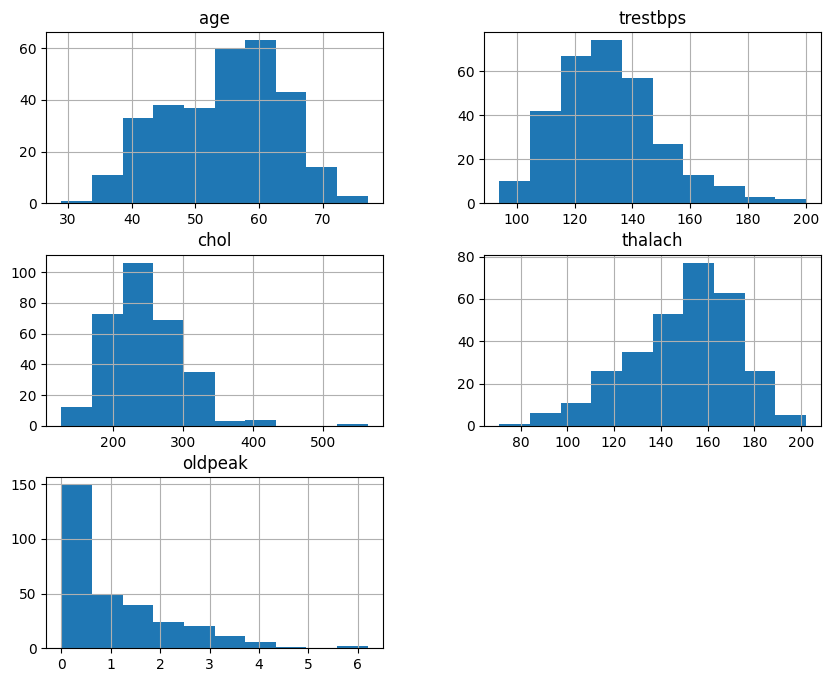

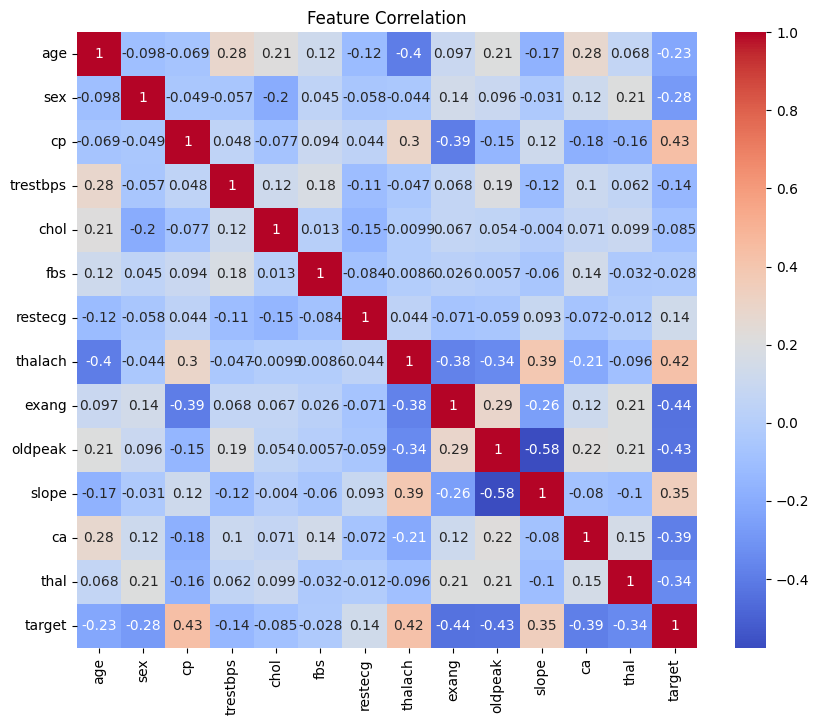

In [6]:

sns.countplot(x='target', data=df)
plt.title("Heart Disease Class Balance")
plt.show()

# Feature distributions
df[numerical_cols].hist(figsize=(10,8))
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [7]:

# 4. Model Building: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Pipelines for each model
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

results = []

for name, model in models.items():
    pipeline = Pipeline([
        ('pre', preprocessor),
        ('clf', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Confusion Matrix:\n{cm}\n")

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    })


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        28
           1       0.78      0.88      0.83        33

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

Confusion Matrix:
[[20  8]
 [ 4 29]]

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.68      0.69        28
           1       0.74      0.76      0.75        33

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61

Confusion Matrix:
[[19  9]
 [ 8 25]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.64      0.72        28
           1       0.74      0.88      0.81 

In [8]:

# 5. Comparison Table
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.803279   0.783784  0.878788  0.828571
1        Decision Tree  0.721311   0.735294  0.757576  0.746269
2        Random Forest  0.770492   0.743590  0.878788  0.805556
